# 201902-Fordgobike-Tripdata exploration
## by Abdelrahman Shalaby

## Investigation Overview

When most trips taken in terms of time of day, day of the week?

## Dataset Overview

Dataset consists of 183412 observations for each observation contains 16 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.dropna(inplace = True)
import datetime
import calendar
# convert start time from string to timestamp
df['start_time'] = df.start_time.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
# create new column name day_of_week
df['day_of_week'] = df.start_time.apply(lambda x: calendar.day_name[x.weekday()])
# create new column name time_of_day
df['time_of_day'] = df.start_time.apply(lambda x: x.hour)
# create new column name age
df['age'] = df.member_birth_year.apply(lambda x: datetime.datetime.now().year - int(x))
# convert column duration_Sec to minute
df['duration_sec'] = df['duration_sec'] / 60
# change column name form duration_sec to duration_minute
df.rename(columns = {'duration_sec':'duration_minute'},inplace =True)
df = df[df['age']<=80]
df.head()

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,time_of_day,age
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,37
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,49
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,32
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,47
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,62


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## day of the week Distribution
Thursday is the most day people take a trip

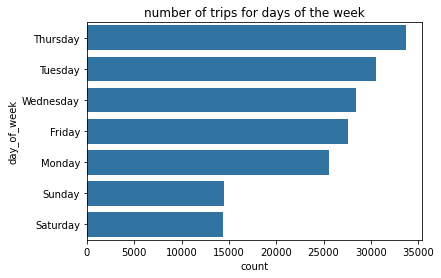

In [4]:
base_color = sb.color_palette()[0]
order = df['day_of_week'].value_counts().index
sb.countplot(data=df, y='day_of_week', color=base_color,order = order);
plt.title('number of trips for days of the week');

## time of the day Distribution

This plot is multimod with picks at 17 and 8

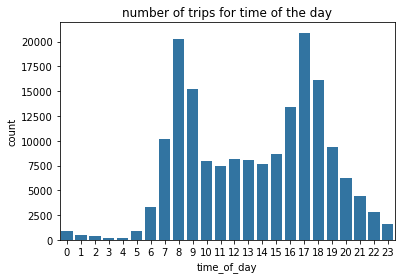

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='time_of_day', color=base_color );
plt.title('number of trips for time of the day');

## day of the week vs member gender

All days of the week number of males take a trip more than females and others

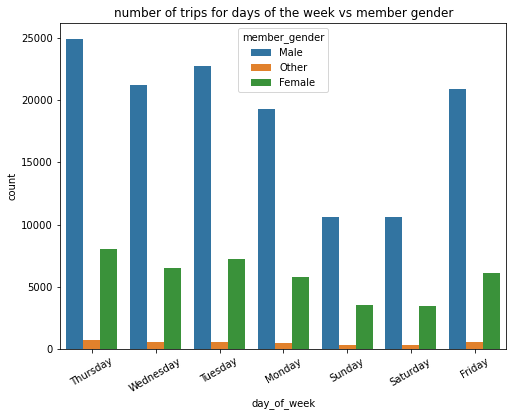

In [6]:
plt.figure(figsize = [8,6])
sb.countplot(data = df,x= 'day_of_week',hue='member_gender')
plt.xticks(rotation = 30);
plt.title('number of trips for days of the week vs member gender');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [7]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 630813 bytes to slide_deck_template.slides.html
